In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
sales = pd.read_csv('sales.csv')
sales.head(10)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [4]:
sales.rename(columns={'Unnamed: 0':'index'},inplace=True)
sales.set_index('index',inplace=True)

In [5]:
import datetime 
sales[["Year","Month","Day"]] = sales["date"].str.split("-", expand = True)
sales["date"]=pd.to_datetime(sales["date"])

In [6]:
sales.drop('date',axis=1,inplace=True)

In [8]:
sales=pd.get_dummies(sales, columns=['state_holiday'], drop_first=True)


In [9]:
sales = pd.get_dummies(sales, columns=['Year', 'Month'], drop_first=True)

In [13]:
sales.drop('Day', axis=1, inplace=True)


<Axes: >

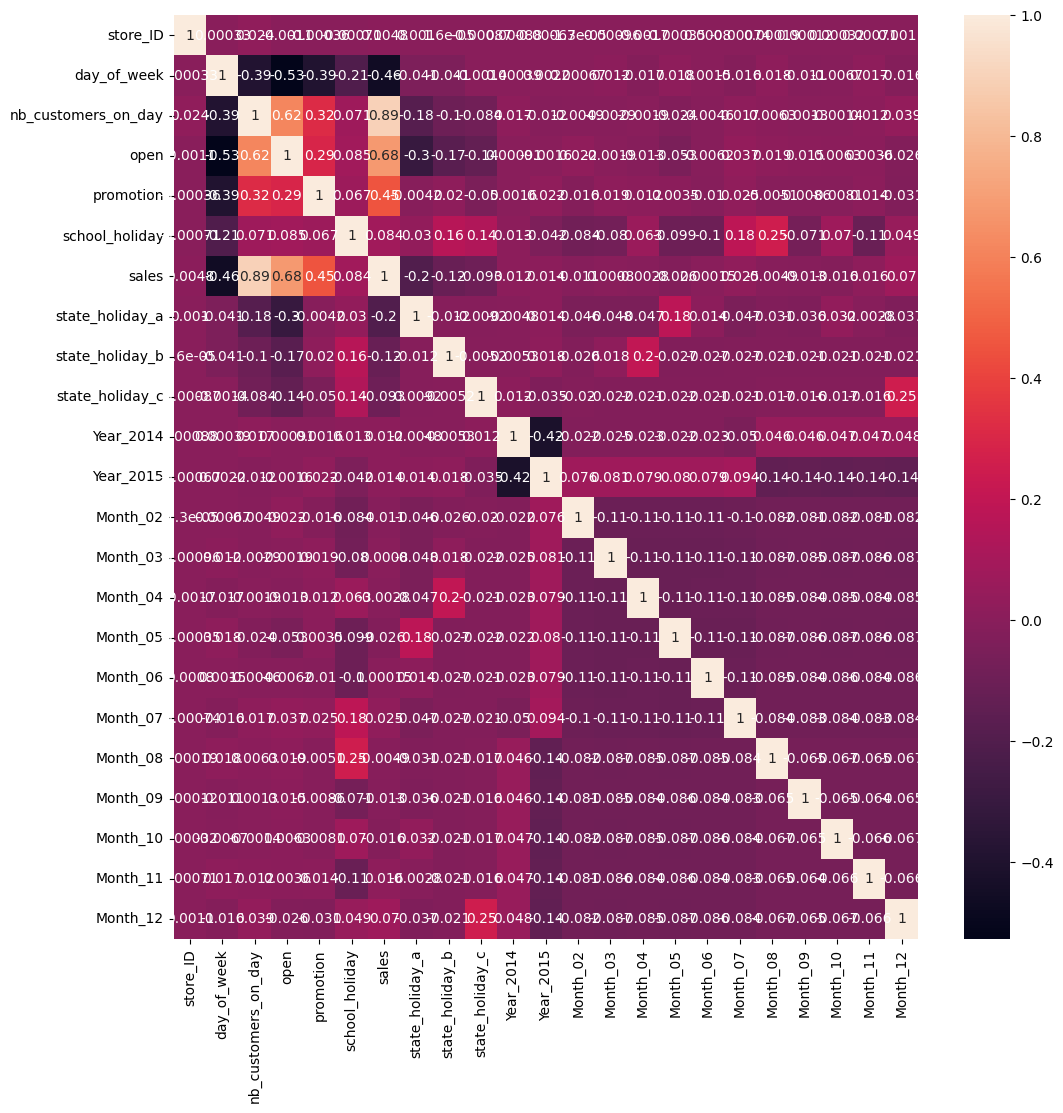

In [14]:
#analyzing correlations
plt.figure(figsize=(12,12))
sns.heatmap(sales.corr(),annot=True,cbar=True)

In [35]:
sales = sales.astype(int)


In [36]:
sales

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,...,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
index,,,,,,,,,,,,,,,,,,,,,
425390,366,4,517,1,0,0,4422,0,0,0,...,0,1,0,0,0,0,0,0,0,0
291687,394,6,694,1,0,0,8297,0,0,0,...,0,1,0,0,0,0,0,0,0,0
411278,807,4,970,1,1,0,9729,0,0,0,...,0,0,0,0,0,1,0,0,0,0
664714,802,2,473,1,1,0,6513,0,0,0,...,0,0,1,0,0,0,0,0,0,0
540835,726,4,1068,1,1,0,10882,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,409,6,483,1,0,0,4553,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152315,97,1,987,1,1,0,12307,0,0,0,...,0,1,0,0,0,0,0,0,0,0
117952,987,1,925,1,0,0,6800,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Models 

In [37]:
from sklearn.model_selection import train_test_split

X=sales.drop(['sales'],axis=1)
y=sales['sales']

In [38]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [39]:
import xgboost as xgb

In [40]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# Checking the score and if maybe overfitting
print(xgb_reg.score(X_test,y_test))
print(xgb_reg.score(X_train, y_train))

0.9316843925818359
0.9350260382866478


In [28]:
data_new = sales.loc[sales["open"]==1]
data_new = sales.loc[sales["nb_customers_on_day"]!= 0]

In [43]:
data_new = data_new.astype(int)


In [44]:
data_new

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,...,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
index,,,,,,,,,,,,,,,,,,,,,
425390,366,4,517,1,0,0,4422,0,0,0,...,0,1,0,0,0,0,0,0,0,0
291687,394,6,694,1,0,0,8297,0,0,0,...,0,1,0,0,0,0,0,0,0,0
411278,807,4,970,1,1,0,9729,0,0,0,...,0,0,0,0,0,1,0,0,0,0
664714,802,2,473,1,1,0,6513,0,0,0,...,0,0,1,0,0,0,0,0,0,0
540835,726,4,1068,1,1,0,10882,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122579,77,6,701,1,0,0,8219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
359783,409,6,483,1,0,0,4553,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152315,97,1,987,1,1,0,12307,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
X2=data_new.drop(['sales'],axis=1)
y2=data_new['sales']

In [46]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)


In [47]:
xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
# Checking the score and overfitting
print(xgb_reg2.score(X2_test,y2_test))
print(xgb_reg2.score(X2_train, y2_train))

0.8722907823368724
0.8774356850008018


In [49]:
y_pred = xgb_reg.predict(X_test)

y_pred

array([4080.8306  , 5050.952   , 5995.679   , ..., 7404.9453  ,
        -37.442444, 7604.3525  ], dtype=float32)

In [50]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  1004.746438
